In [11]:
from selenium import webdriver

In [25]:
opts = webdriver.ChromeOptions()
opts.add_experimental_option('prefs', {
    'download.default_directory' : r"D:\TIL\Intelligence Information System\Opinet Data"
})

driver = webdriver.Chrome(r"C:\Users\phi49\Downloads\chromedriver_win32\chromedriver.exe", options=opts)

C:\Users\phi49\AppData\Local\Temp\ipykernel_5672\3002662183.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\phi49\Downloads\chromedriver_win32\chromedriver.exe", options=opts)


In [26]:
main_url = "https://www.opinet.co.kr/user/main/mainView.do"
driver.get(main_url)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver.get(url)

In [27]:
sido_xpath= '//*[@id="SIGUNGU_NM0"]'
driver.find_element("xpath", sido_xpath).send_keys("인천")

In [28]:
gu_xpath = '//*[@id="SIGUNGU_NM0"]'
driver.find_element("xpath", gu_xpath).send_keys("연수구")

In [29]:
search_button = '//*[@id="searRgSelect"]'
driver.find_element("xpath", search_button).click()

In [31]:
save_excel_button = '//*[@id="glopopd_excel"]'
driver.find_element("xpath", save_excel_button).click()

## 1. 인천시 구별 주유소 가격 정보 가져오기

In [35]:
main_url = "https://www.opinet.co.kr/user/main/mainView.do"
driver.get(main_url)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver.get(url)

In [36]:
sido_xpath= '//*[@id="SIGUNGU_NM0"]'
driver.find_element("xpath", sido_xpath).send_keys("인천")

In [45]:
gu_xpath = '//*[@id="SIGUNGU_NM0"]'
gu_list_raw = driver.find_element("xpath", gu_xpath)
gu_list = gu_list_raw.find_elements("tag name", "option")

for g in gu_list:
    print(g.text)

시/군/구
강화군
계양구
남동구
동구
미추홀구
부평구
서구
연수구
옹진군
중구


In [46]:
gu_names = []
for i in range(len(gu_list)):
    if i > 0:
        gu_names.append(gu_list[i].text)
print(gu_names)

['강화군', '계양구', '남동구', '동구', '미추홀구', '부평구', '서구', '연수구', '옹진군', '중구']


In [50]:
import time
from tqdm.notebook import tqdm

for i in tqdm(range(len(gu_names))):
    print(gu_names[i])
    
    # 구 선택하기
    gu_xpath = '//*[@id="SIGUNGU_NM0"]'
    driver.find_element("xpath", gu_xpath).send_keys(gu_names[i])
    
    time.sleep(3)
    
    # 조회 버튼 클릭하기
    search_button = '//*[@id="searRgSelect"]'
    driver.find_element("xpath", search_button).click()
    
    time.sleep(3)
    
    # 엑셀저장 버튼 클릭하기
    save_excel_button = '//*[@id="glopopd_excel"]'
    driver.find_element("xpath", save_excel_button).click()
    
    time.sleep(3)

  0%|          | 0/10 [00:00<?, ?it/s]

강화군
계양구
남동구
동구
미추홀구
부평구
서구
연수구
옹진군
중구


In [51]:
# 크롬 드라이버 닫기
driver.close()

## 2. 구별 주유 가격에 대한 데이터의 정리

In [54]:
from glob import glob

In [56]:
cd D:\TIL\Intelligence Information System\Opinet Data

D:\TIL\Intelligence Information System\Opinet Data


In [57]:
glob('지역*.xls')

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls',
 '지역_위치별(주유소).xls']

In [58]:
station_files = glob('지역*.xls')
station_files

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls',
 '지역_위치별(주유소).xls']

In [61]:
import pandas as pd

tmp_list = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_list.append(tmp)
    
tmp_list[0]

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,인천광역시,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,032-555-9143,Y,-,1573,1835,-
1,인천광역시,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,032-552-5185,Y,1999,1583,1864,-
2,인천광역시,그린에너지,인천 계양구 솔고개길 2,S-OIL,032-584-5189,N,-,1584,1864,1650
3,인천광역시,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,032-519-9922,Y,-,1585,1856,-
4,인천광역시,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,032-513-8903,N,-,1595,1865,-
5,인천광역시,명품주유소,인천 계양구 경명대로 971 (계산동),GS칼텍스,032-546-0777,Y,-,1615,1885,-
6,인천광역시,(주)보라미주유소,인천 계양구 장기로 7 (장기동),현대오일뱅크,032-541-2175,Y,-,1615,1885,1700
7,인천광역시,오주유소,인천 계양구 아나지로 553,현대오일뱅크,032-554-5189,N,-,1615,1885,1800
8,인천광역시,양정주유소,인천 계양구 아나지로 597 (서운동),알뜰주유소,032-555-4749,Y,-,1615,1885,-
9,인천광역시,동양동주유소,인천 계양구 벌말로 328 (동양동),GS칼텍스,032-513-5831,Y,-,1615,1885,-


In [62]:
stations = pd.concat(tmp_list)
stations.shape

(319, 10)

In [63]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 26
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      319 non-null    object
 1   상호      319 non-null    object
 2   주소      319 non-null    object
 3   상표      319 non-null    object
 4   전화번호    319 non-null    object
 5   셀프여부    319 non-null    object
 6   고급휘발유   319 non-null    object
 7   휘발유     319 non-null    object
 8   경유      319 non-null    object
 9   실내등유    319 non-null    object
dtypes: object(10)
memory usage: 27.4+ KB


In [64]:
stations.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,인천광역시,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,032-555-9143,Y,-,1573,1835,-
1,인천광역시,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,032-552-5185,Y,1999,1583,1864,-
2,인천광역시,그린에너지,인천 계양구 솔고개길 2,S-OIL,032-584-5189,N,-,1584,1864,1650
3,인천광역시,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,032-519-9922,Y,-,1585,1856,-
4,인천광역시,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,032-513-8903,N,-,1595,1865,-


In [72]:
stations_sel = stations.loc[:, ['상호', '주소', '상표', '셀프여부', '휘발유']]
stations_sel

,상호,주소,상표,셀프여부,휘발유
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595
...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790


In [73]:
stations_sel.columns = ['주유소', '주소', '상표', '셀프여부', '가격']
stations_sel

,주유소,주소,상표,셀프여부,가격
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595
...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790


In [74]:
# '연수구'와 같은 군/구 정보만 추출하기
# '인천 계양구 벌말로 295' -> '계양구'

gu_list = []

for address in stations['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)
    
stations_sel['군/구'] = gu_list
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,계양구
...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,강화군


In [75]:
# 군/구 목록 확인

stations_sel['군/구'].unique()

array(['계양구', '남동구', '동구', '미추홀구', '남구', '부평구', '서구', '연수구', '옹진군', '중구',
       '강화군'], dtype=object)

### 모든 것을 다 최신 버전으로 바꾸는 명령어: pip install xlrd

In [79]:
# 예외 처리하기

stations_sel = stations_sel.query("가격 != '-'").copy()
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,계양구
...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,강화군


In [81]:
# 가격을 숫자(int)으로 변경하기

price_list = []

for price in stations_sel['가격']:
    price_new = int(price)
    price_list.append(price_new)

stations_sel['가격'] = price_list
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,계양구
...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,강화군


In [83]:
stations_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주유소     316 non-null    object
 1   주소      316 non-null    object
 2   상표      316 non-null    object
 3   셀프여부    316 non-null    object
 4   가격      316 non-null    int64 
 5   군/구     316 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.3+ KB


In [84]:
stations_sel.reset_index(inplace=True)
stations_sel

,index,주유소,주소,상표,셀프여부,가격,군/구
0,0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,계양구
1,1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,계양구
2,2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,계양구
3,3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,계양구
4,4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,계양구
...,...,...,...,...,...,...,...
311,22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,강화군
312,23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,강화군
313,24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,강화군
314,25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,강화군


In [85]:
# 필요없는 칼럼 제거
del stations_sel['index']
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,계양구
...,...,...,...,...,...,...
311,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,강화군
312,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,강화군
313,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,강화군
314,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,강화군


In [87]:
stations_sel_name = stations_sel.set_index('상표')
stations_sel_name

,주유소,주소,셀프여부,가격,군/구
상표,,,,,
알뜰주유소,원천제2주유소,인천 계양구 벌말로 295,Y,1573,계양구
현대오일뱅크,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),Y,1583,계양구
S-OIL,그린에너지,인천 계양구 솔고개길 2,N,1584,계양구
현대오일뱅크,박촌주유소,인천 계양구 장제로 1021 (박촌동),Y,1585,계양구
GS칼텍스,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),N,1595,계양구
...,...,...,...,...,...
S-OIL,세광주유소,인천 강화군 선원면 중앙로 205,N,1699,강화군
자가상표,한국주유소,인천 강화군 선원면 중앙로 445,N,1719,강화군
GS칼텍스,교동주유소,인천 강화군 교동면 대룡안길54번길 5,N,1720,강화군


## 3. 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

<AxesSubplot:title={'center':'가격'}, xlabel='셀프여부'>

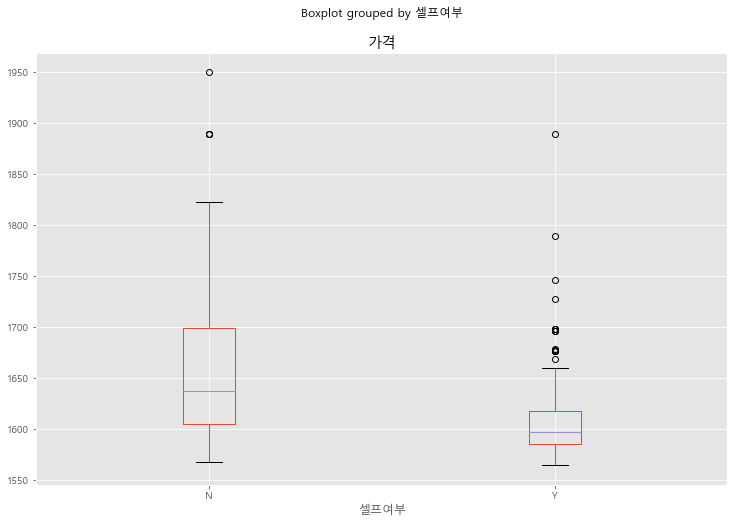

In [88]:
# matplotlib 설정하기
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

stations_sel.boxplot(column='가격', by='셀프여부', figsize=(12, 8))

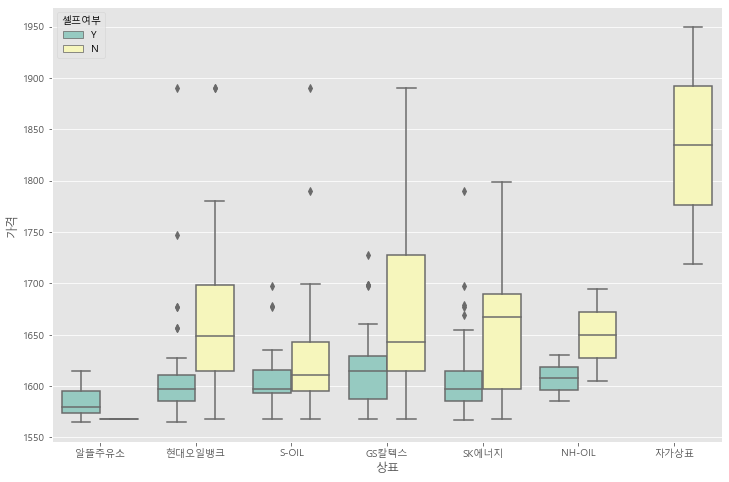

In [89]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프여부", data=stations_sel, palette="Set3")
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프여부", data=stations_sel, palette="Set3")
plt.show()